# **Final Capstone - Michael Jordan Performance**

I'm going to be using an edited version of the Michael Jordan Career Regular Season Statistics by Game from 1985 to 2003. The original dataset is from https://sports-statistics.com/sports-data/sports-data-sets-for-data-modeling-visualization-predictions-machine-learning/. In my analysis I'm expecting to gain some insights into how Michael Jordan performance varied in certain situations.
This version of the dataset contains 36,122 cells, 1072 rows, and 36 columns. The following are numeric data types: Id, Randbucket, EndYear, Rk, G, Years, Days, Age, Home, Win, Diff, Gs, MP, FG, FGA, FG_PCT, 3P, 3PA, 3P_PCT, FT, FTA, FT_PCT, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, GmSc. Leaving Buckets, Date, Tm, and Opp as strings. For this dataset, the identifier (Id), as well as Randbucket and Buckets, were generated in Excel to facilitate the A/A testing.

**The hypothesis I will be testing are the following:**

- Hypothesis 1: Was Michael Jordan’s game score performance any different when playing against any particular team while playing with the Chicago Bulls?
-Hypothesis 2: Did Michael Jordan make more 3 points goal field shots when playing on the home field while playing with the Chicago Bulls?




Let's start by mounting the drive:


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now let's import the libraries...

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
from statistics import mean
from scipy.stats import ttest_ind
import seaborn as sns 
import matplotlib.pyplot as plt
import math

...and load the dataset.

In [ ]:
mj_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/Capstone Projects/Capstone Project 3 Michael Jordan Stats/michael-jordan-nba-career-regular-season-stats-by-game (1).csv')

Although we already have an overview of what's in the dataset let's see what we are dealing with.

In [ ]:
print(mj_df.shape)
print(mj_df.info())

(1072, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          1072 non-null   int64  
 1   Randbucket  1072 non-null   float64
 2   Buckets     1072 non-null   object 
 3   EndYear     1072 non-null   int64  
 4   Rk          1072 non-null   int64  
 5   G           1072 non-null   int64  
 6   Date        1072 non-null   object 
 7   Years       1072 non-null   int64  
 8   Days        1072 non-null   int64  
 9   Age         1072 non-null   float64
 10  Tm          1072 non-null   object 
 11  Home        1072 non-null   int64  
 12  Opp         1072 non-null   object 
 13  Win         1072 non-null   int64  
 14  Diff        1072 non-null   int64  
 15  GS          1072 non-null   int64  
 16  MP          1072 non-null   int64  
 17  FG          1072 non-null   int64  
 18  FGA         1072 non-null   int64  
 19  FG_PCT      1072

In [ ]:
# First five rows
mj_df.head()

,Id,Randbucket,Buckets,EndYear,Rk,G,Date,Years,Days,Age,Tm,Home,Opp,Win,Diff,GS,MP,FG,FGA,FG_PCT,3P,3PA,3P_PCT,FT,FTA,FT_PCT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1,0.708390,A1,1985,1,1,10/26/1984,21,252,21.689938,CHI,1,WSB,1,16,1,40,5,16,0.313,0,0,NaN,6,7,0.857,1,5,6,7,2,4,5,2,16,12.5
1,2,0.175681,A2,1985,2,2,10/27/1984,21,253,21.692676,CHI,0,MIL,0,-2,1,34,8,13,0.615,0,0,NaN,5,5,1.000,3,2,5,5,2,1,3,4,21,19.4
2,3,0.776172,A1,1985,3,3,10/29/1984,21,255,21.698152,CHI,1,MIL,1,6,1,34,13,24,0.542,0,0,NaN,11,13,0.846,2,2,4,5,6,2,3,4,37,32.9
3,4,0.679130,A1,1985,4,4,10/30/1984,21,256,21.700890,CHI,0,KCK,1,5,1,36,8,21,0.381,0,0,NaN,9,9,1.000,2,2,4,5,3,1,6,5,25,14.7
4,5,0.292316,A2,1985,5,5,11/1/1984,21,258,21.706366,CHI,0,DEN,0,-16,1,33,7,15,0.467,0,0,NaN,3,4,0.750,3,2,5,5,1,1,2,4,17,13.2


There's a clearer picture but there are some missing values, although I'm not going to be working with them I'd like to see how many are there.

In [ ]:
# Counting the amount of nulls
column_null = mj_df.isnull().sum()
print(column_null)

Id              0
Randbucket      0
Buckets         0
EndYear         0
Rk              0
G               0
Date            0
Years           0
Days            0
Age             0
Tm              0
Home            0
Opp             0
Win             0
Diff            0
GS              0
MP              0
FG              0
FGA             0
FG_PCT          0
3P              0
3PA             0
3P_PCT        330
FT              0
FTA             0
FT_PCT         30
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GmSc            0
dtype: int64


3P_PCT (3 points goal field percentage) is missing 330 values and FT_PCT is missing 30.

For this analysis I'm going to be working only with the data when Jordan was part of Chicago Bulls, let's filter the dataset.

In [ ]:
# Filtering games to when Michael Jordan played with Chicago Bulls
mj_df_chi_bulls = mj_df.iloc[(mj_df['Tm']=='CHI').values]
print(mj_df_chi_bulls.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 929
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          930 non-null    int64  
 1   Randbucket  930 non-null    float64
 2   Buckets     930 non-null    object 
 3   EndYear     930 non-null    int64  
 4   Rk          930 non-null    int64  
 5   G           930 non-null    int64  
 6   Date        930 non-null    object 
 7   Years       930 non-null    int64  
 8   Days        930 non-null    int64  
 9   Age         930 non-null    float64
 10  Tm          930 non-null    object 
 11  Home        930 non-null    int64  
 12  Opp         930 non-null    object 
 13  Win         930 non-null    int64  
 14  Diff        930 non-null    int64  
 15  GS          930 non-null    int64  
 16  MP          930 non-null    int64  
 17  FG          930 non-null    int64  
 18  FGA         930 non-null    int64  
 19  FG_PCT      930 non-null    f

In [ ]:
# Filtered first five rows
mj_df_chi_bulls.head()

,Id,Randbucket,Buckets,EndYear,Rk,G,Date,Years,Days,Age,Tm,Home,Opp,Win,Diff,GS,MP,FG,FGA,FG_PCT,3P,3PA,3P_PCT,FT,FTA,FT_PCT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1,0.708390,A1,1985,1,1,10/26/1984,21,252,21.689938,CHI,1,WSB,1,16,1,40,5,16,0.313,0,0,NaN,6,7,0.857,1,5,6,7,2,4,5,2,16,12.5
1,2,0.175681,A2,1985,2,2,10/27/1984,21,253,21.692676,CHI,0,MIL,0,-2,1,34,8,13,0.615,0,0,NaN,5,5,1.000,3,2,5,5,2,1,3,4,21,19.4
2,3,0.776172,A1,1985,3,3,10/29/1984,21,255,21.698152,CHI,1,MIL,1,6,1,34,13,24,0.542,0,0,NaN,11,13,0.846,2,2,4,5,6,2,3,4,37,32.9
3,4,0.679130,A1,1985,4,4,10/30/1984,21,256,21.700890,CHI,0,KCK,1,5,1,36,8,21,0.381,0,0,NaN,9,9,1.000,2,2,4,5,3,1,6,5,25,14.7
4,5,0.292316,A2,1985,5,5,11/1/1984,21,258,21.706366,CHI,0,DEN,0,-16,1,33,7,15,0.467,0,0,NaN,3,4,0.750,3,2,5,5,1,1,2,4,17,13.2


Before checking the first hypothesis we have some preparative work to do, let's run a descriptive test on the *GmSc* column.

count    930.000000
mean      24.873333
std        8.840941
min       -0.400000
25%       18.500000
50%       24.600000
75%       30.575000
max       64.600000
Name: GmSc, dtype: float64


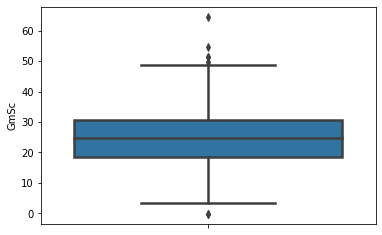

In [ ]:
# Descriptive stats on the game scores
print(mj_df_chi_bulls["GmSc"].describe())
sns.boxplot(y='GmSc', data=mj_df_chi_bulls, linewidth=2.5)


Now let's run an A/A test to make sure that the sample is unbised that's where the Bucket column comes handy. First, we are going to filter the dataset by *Bucket*:



count    486.000000
mean      24.696708
std        8.790411
min       -0.400000
25%       18.450000
50%       24.300000
75%       29.975000
max       64.600000
Name: GmSc, dtype: float64 

count    444.000000
mean      25.066667
std        8.901818
min       -0.300000
25%       18.500000
50%       25.100000
75%       31.050000
max       54.700000
Name: GmSc, dtype: float64


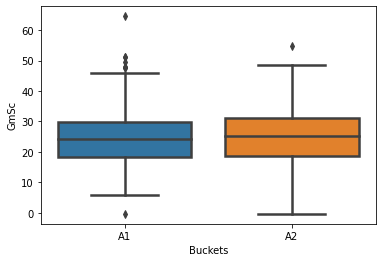

In [ ]:
mj_df_first_bucket = mj_df_chi_bulls.iloc[(mj_df_chi_bulls['Buckets']=='A1').values]
mj_df_second_bucket = mj_df_chi_bulls.iloc[(mj_df_chi_bulls['Buckets']=='A2').values]

# Descriptive of each bucket
print(mj_df_first_bucket['GmSc'].describe(),'\n')
print(mj_df_second_bucket['GmSc'].describe())

# Boxplot, this code keeps both bucket in the same dataframe
first_and_second_bucket = (mj_df_chi_bulls['Buckets']=='A1') | (mj_df_chi_bulls['Buckets']=='A2')
aa_test_df = mj_df_chi_bulls.iloc[first_and_second_bucket.values]
sns.boxplot(y='GmSc', x='Buckets', data=aa_test_df, linewidth=2.5)


Our *null hypothesis* for the A/A test is:

H₀: µ = µ₀

Hₐ: µ₁ - µ₂ ≠ 0

In [ ]:
# t test forward and backward
print(stats.ttest_ind(mj_df_first_bucket['GmSc'], mj_df_second_bucket['GmSc']))
print(stats.ttest_ind(mj_df_second_bucket['GmSc'], mj_df_first_bucket['GmSc']))


Ttest_indResult(statistic=-0.6372123632007787, pvalue=0.5241436923743286)
Ttest_indResult(statistic=0.6372123632007787, pvalue=0.5241436923743286)


From this result we see that the p-value is higher than 0.05 thus failing to reject the null hypothesis, in other words the difference is insignificant at p > 0.05.

Next, we are going to create a function that helps us determine the confidence interval.


In [ ]:
# Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(mj_df_first_bucket['GmSc'], mj_df_second_bucket['GmSc']), '\n')

The difference in means at the 95% confidence interval (two-tail) is between -0.7686447710437483 and 1.5085624665169937. 



With 95% confindence, the difference is between -0.769 and 1.509 difference in means. 

With all that we can move on to hypothesis 1.



# **Hypothesis 1**
***Was Michael Jordan game score performance any different when playing any particular team while playing with the Chicago Bulls?***

First, let's see the GmSc total sum, count and mean by team:


In [ ]:
# GmSc sum by team
mj_df_chi_bulls.groupby(['Opp']).sum()['GmSc'].sort_values(ascending=False)


Opp
MIL    1585.6
CLE    1454.9
ATL    1424.9
IND    1373.1
DET    1356.1
NYK    1342.2
PHI    1273.4
BOS    1255.3
NJN    1237.2
WSB    1062.0
CHH     868.2
MIA     783.2
ORL     676.3
DEN     591.4
POR     590.4
UTA     588.7
GSW     582.8
PHO     580.6
SEA     547.2
HOU     547.1
SAC     541.2
SAS     528.1
LAC     512.0
LAL     509.4
DAL     507.3
MIN     357.0
TOR     244.3
VAN     103.6
WAS      68.5
KCK      40.2
Name: GmSc, dtype: float64

In [ ]:
# GmSc count by team
mj_df_chi_bulls.groupby(['Opp'])['GmSc'].agg('count').sort_values(ascending=False)

Opp
MIL    60
CLE    60
DET    58
ATL    58
IND    57
NYK    53
BOS    50
PHI    50
NJN    50
WSB    45
CHH    34
MIA    30
ORL    27
GSW    23
LAC    22
DEN    22
UTA    22
HOU    22
LAL    22
SEA    22
POR    22
PHO    21
DAL    21
SAS    21
SAC    20
MIN    14
TOR    12
VAN     6
WAS     4
KCK     2
Name: GmSc, dtype: int64

In [ ]:
# GmSc mean by team
mj_df_chi_bulls.groupby(['Opp'])['GmSc'].agg('mean').sort_values(ascending=False)

Opp
PHO    27.647619
SAC    27.060000
DEN    26.881818
POR    26.836364
UTA    26.759091
MIL    26.426667
MIA    26.106667
CHH    25.535294
MIN    25.500000
PHI    25.468000
GSW    25.339130
NYK    25.324528
SAS    25.147619
BOS    25.106000
ORL    25.048148
SEA    24.872727
HOU    24.868182
NJN    24.744000
ATL    24.567241
CLE    24.248333
DAL    24.157143
IND    24.089474
WSB    23.600000
DET    23.381034
LAC    23.272727
LAL    23.154545
TOR    20.358333
KCK    20.100000
VAN    17.266667
WAS    17.125000
Name: GmSc, dtype: float64

A graph can make this info more readable, let's plot the means and counts by team.

[Text(0, 0.5, 'Average'),
 Text(0.5, 0, 'Teams'),
 Text(0.5, 1.0, 'Game Score Averages \nby Team')]

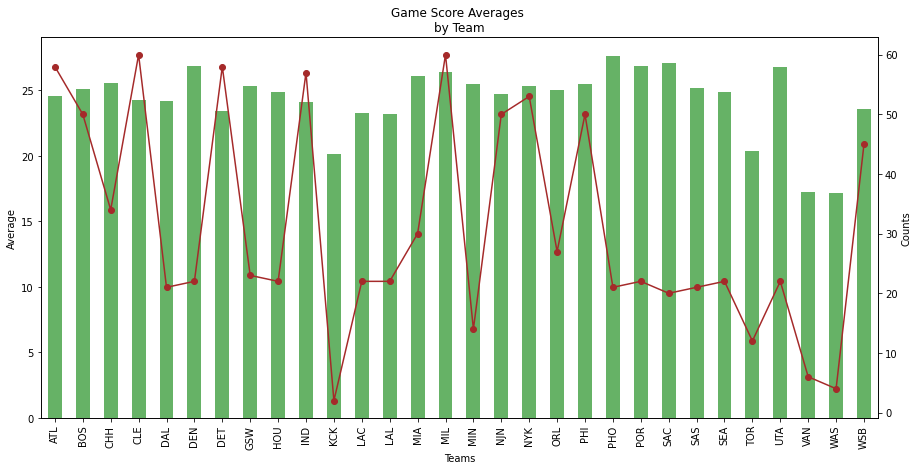

In [ ]:
# Size
fig, ax = plt.subplots(figsize=(15,7)) 


# Line graph 
line_graph = mj_df_chi_bulls.groupby(['Opp']).count()['GmSc'].plot(ax=ax, marker= 'o', color='brown', secondary_y=True)
line_graph.set_ylabel('Counts')

# Bar chart
bar_graph = mj_df_chi_bulls.groupby(['Opp']).mean()['GmSc'].plot.bar(ax=ax, alpha=0.6, color='green')
bar_graph.set(title = "Game Score Averages \nby Team",
       xlabel = "Teams",
       ylabel = "Average")

In [ ]:
# Line graph 
mj_df_chi_bulls.groupby(['Opp']).count()['GmSc'].plot(ax=ax, marker= 'o', color='brown')
#line_graph.set_ylabel('Counts')

For this first hipothesis we're going to be testing Detroit Pistons and Milwaukee Bucks.

**Descriptive Stats**


In [ ]:
# Detroit Piston descriptive
detroit_gmsc = mj_df_chi_bulls.iloc[(mj_df_chi_bulls['Opp']=='DET').values]
detroit_gmsc.head()
print(detroit_gmsc['GmSc'].describe(), '\n')



count    58.000000
mean     23.381034
std      10.110312
min       5.900000
25%      15.425000
50%      21.200000
75%      29.350000
max      54.700000
Name: GmSc, dtype: float64 



In [ ]:
# Milwaukee Bucks descriptive
mil_gmsc =mj_df_chi_bulls.iloc[(mj_df_chi_bulls['Opp']=='MIL').values]
mil_gmsc.head()
print(mil_gmsc['GmSc'].describe())

count    60.000000
mean     26.426667
std       8.400946
min      -0.400000
25%      21.325000
50%      27.650000
75%      31.450000
max      43.500000
Name: GmSc, dtype: float64


And t-test. 

H₀: µ₁ - µ₂ = 0  
Hₐ: µ₁ - µ₂ ≠ 0  


Ttest_indResult(statistic=-1.782227137071485, pvalue=0.07732840110438662)
Ttest_indResult(statistic=1.782227137071485, pvalue=0.07732840110438662)
The difference in means at the 95% confidence interval (two-tail) is between -0.3142966899087156 and 6.40556105772481.


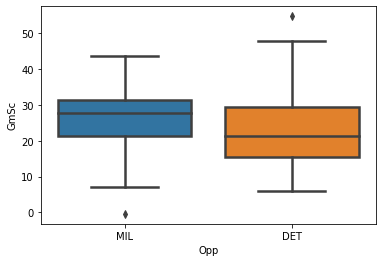

In [ ]:
# t-test 
print(stats.ttest_ind(detroit_gmsc['GmSc'], mil_gmsc['GmSc']))
print(stats.ttest_ind(mil_gmsc['GmSc'], detroit_gmsc['GmSc']))

# Boxplot 
det_and_mil = (mj_df_chi_bulls['Opp']=='DET') | (mj_df_chi_bulls['Opp']=='MIL')
hypothesis_1_df = mj_df_chi_bulls.iloc[det_and_mil.values]
sns.boxplot(y='GmSc', x= 'Opp', data=hypothesis_1_df, linewidth=2.5)

# Confidence interval
print(get_95_ci(detroit_gmsc['GmSc'], mil_gmsc['GmSc']))

### **Hypothesis 1 Results:**
***Was Michael Jordan game score performance any different when playing against the Bucks and Piston while playing with the Chicago Bulls?***
 
Fail to reject the null that there's no difference between samples. There isn't a significant difference at p > 0.05. The 95% confidence interval is between -0.314 and 6.406.
 
In other words, Michael Jordan’s performance as measured by game score was statistically the same playing against Mil Bucks and Det Piston.





---


# **Hypothesis 2** 
 ***Did Michael Jordan makes more 3 points shots when playing on home field while playing with the Chicago Bulls?***
 
Before I'd like to clarify that in this analysis we are testing 3 points goal shots made not 3 points goal field attempted. With that out of the way let's start the drill.


count    930.000000
mean       0.596774
std        1.012192
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: 3P, dtype: float64 



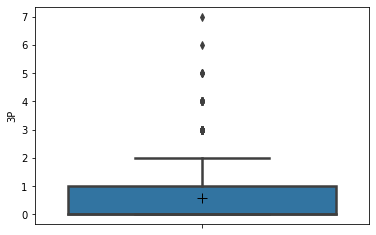

In [ ]:
# Descriptive Stats
print(mj_df_chi_bulls["3P"].describe(), '\n')
sns.boxplot(y='3P', data=mj_df_chi_bulls, showmeans=True,
            meanprops={"marker":"+",
                       "markeredgecolor":"black",
                       "markersize":"10"}, linewidth=2.5)


Now, let's check that the data is unbiased.


In [ ]:
# Descriptive bucket 1
three_points_bucket_one = mj_df_chi_bulls.iloc[(mj_df_chi_bulls['Buckets']=='A1').values]
print(three_points_bucket_one['3P'].describe())

count    486.000000
mean       0.578189
std        0.984968
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: 3P, dtype: float64


In [ ]:
# Descriptive bucket 2
three_points_bucket_two = mj_df_chi_bulls.iloc[(mj_df_chi_bulls['Buckets']=='A2').values]
print(three_points_bucket_two['3P'].describe())

count    444.000000
mean       0.617117
std        1.041910
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: 3P, dtype: float64


Our null hypothesis for the A/A test on 3P is:

H₀: µ = µ₀

Hₐ: µ₁ - µ₂ ≠ 0

Ttest_indResult(statistic=-0.585614430894563, pvalue=0.5582770300689193)
The difference in means at the 95% confidence interval (two-tail) is between -0.09169127717392953 and 0.1695469105851186.


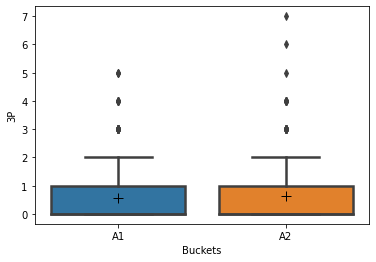

In [ ]:
# t test forward and backward
print(stats.ttest_ind(three_points_bucket_one['3P'], three_points_bucket_two['3P']))

# Boxplot
first_and_second_three_points_bucket = (mj_df_chi_bulls['Buckets']=='A1') | (mj_df_chi_bulls['Buckets']=='A2')
aa_test_three_points_df = mj_df_chi_bulls.iloc[first_and_second_three_points_bucket.values]
sns.boxplot(y='3P', x='Buckets', 
            data=aa_test_three_points_df, 
            showmeans=True,
            meanprops={"marker":"+",
                       "markeredgecolor":"black",
                       "markersize":"10"},
            linewidth=2.5)

# Confidence interval
print(get_95_ci(three_points_bucket_one['3P'], three_points_bucket_two['3P']))

Perfect, the 3P variable is unbiased as seen by the p-value being higher than 0.05. With that out of the way, we're going to filter the dataset when the Chicago Bulls are playing home field and when they are the visiting team and run descriptive statistics over both.

In [ ]:
# Home field
home_df = mj_df_chi_bulls.iloc[(mj_df_chi_bulls['Home']==1).values]
home_df[['Home', '3P']].head(10)
print(home_df['3P'].describe(), '\n')



count    463.000000
mean       0.652268
std        1.094076
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: 3P, dtype: float64 



In [ ]:
# Visiting
visiting_df = mj_df_chi_bulls.iloc[(mj_df_chi_bulls['Home']==0).values]
visiting_df[['Home', '3P']].head(10)
print(visiting_df['3P'].describe())

count    467.000000
mean       0.541756
std        0.921763
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: 3P, dtype: float64


The means of both samples are quite similar but are they statistically similar? 

Following, we are running the t-test and plotting the result.

H₀: µ₁ - µ₂ = 0

Hₐ: µ₁ - µ₂ ≠ 0

Ttest_indResult(statistic=1.6663596723997052, pvalue=0.09597925664493631)
The difference in means at the 95% confidence interval (two-tail) is between -0.24059292580138095 and 0.019569065954280124.


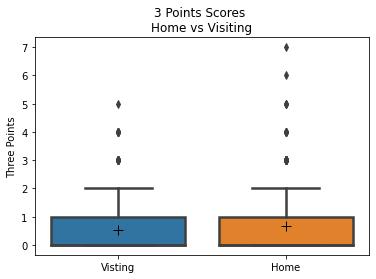

In [ ]:
# t-test
print(stats.ttest_ind(home_df['3P'], visiting_df['3P']))

# Boxplot
home_vs_vis =(mj_df_chi_bulls['Home']== 1) | (mj_df_chi_bulls['Home']== 0)
hypothesis_2_df = mj_df_chi_bulls.iloc[home_vs_vis.values]
ax = sns.boxplot(y='3P', x='Home', data=hypothesis_2_df,
                 showmeans=True,
                 meanprops={"marker":"+",
                       "markeredgecolor":"black",
                       "markersize":"10"},
                 linewidth=2.5)
ax.set(title = "3 Points Scores \nHome vs Visiting",
       xlabel= "",
       ylabel = "Three Points")
x = ['Visting','Home']
ax.set_xticklabels(x)

# Confidence interval
print(get_95_ci(home_df['3P'], visiting_df['3P']))

### **Hypothesis 2 Results:**

***Did Michael Jordan makes more 3 points goal field shots when playing on the home field while playing with the Chicago Bulls?***
 
Fail to reject the null that there's no difference between samples. There isn't a significant difference at p > 0.05. The 95% confidence interval is between -0.241 and 0.0196.
 
In other words, playing home field or visiting didn't make any significant statistical difference.
 
 
---
 
 
 
# **Final Thoughts**
 
With this analysis, we concluded that playing against different teams, specifically the Bucks and the Pistons, didn't make a significant impact on Michael Jordan's performance as measured by game score nor did playing home field or as a visiting team as measured by three points shots.
 
It might seem that Michael Jordan's performance in each game is somewhat the same but we can't be for sure unless we check all the variables. For another run, I'd like to ponder if being an older player had a positive impact on his game score or how his blocks affected his game score and winning values.

